In [2]:
import pandas as pd

In [3]:
df = pd.read_json('evaluation/temp.json')

In [4]:
df.shape

(1, 934)

In [5]:
import pandas as pd
import numpy as np

#NLTK
import nltk
from nltk import word_tokenize, WordPunctTokenizer, regexp_tokenize
from nltk import word_tokenize, WordPunctTokenizer, regexp_tokenize

#Plotting 
import matplotlib.pyplot as plt


#Keras
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


2023-05-05 17:04:28.640905: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 17:04:28.672216: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 17:04:28.673009: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 17:04:29.232987: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
train_yes_es = pd.read_json('training/EXIST2023_training.json')
train_yes_es=train_yes_es.transpose()
train_yes_es=train_yes_es.loc[train_yes_es['lang'].apply(lambda x:x=='es')]
train_yes_es=train_yes_es.loc[train_yes_es['labels_task1'].apply(lambda x:x.count('YES')>3)]
train_yes_es['label1']='YES'

#NO

train_no_es = pd.read_json('training/EXIST2023_training.json')
train_no_es=train_no_es.transpose()
train_no_es=train_no_es.loc[train_no_es['lang'].apply(lambda x:x=='es')]
train_no_es=train_no_es.loc[train_no_es['labels_task1'].apply(lambda x:x.count('NO')>3)]
train_no_es['label1']='NO'

val_yes = pd.read_json('dev/EXIST2023_dev.json')
val_yes=val_yes.transpose()
val_yes=val_yes.loc[val_yes['lang'].apply(lambda x:x=='es')]
val_yes=val_yes.loc[val_yes['labels_task1'].apply(lambda x:x.count('YES')>3)]
val_yes['label1']='YES'

#NO
val_no = pd.read_json('dev/EXIST2023_dev.json')
val_no=val_no.transpose()
val_no=val_no.loc[val_no['lang'].apply(lambda x:x=='es')]
val_no=val_no.loc[val_no['labels_task1'].apply(lambda x:x.count('NO')>3)]
val_no['label1']='NO'


In [7]:
frames = [train_yes_es, train_no_es,val_yes,val_no]
train = pd.concat(frames)
train.reset_index(drop=True)

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,label1
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES,YES
1,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES,YES
2,100008,es,@BestKabest Esta gringa sigue llorando por el ...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, JUDGEMENTAL, DIRECT, ...","[[IDEOLOGICAL-INEQUALITY], [STEREOTYPING-DOMIN...",TRAIN_ES,YES
3,100028,es,"@ShahidForChange @TeamPelosi Quiet, sexist ^%$...",6,"[Annotator_109, Annotator_110, Annotator_111, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, NO, YES, YES, YES]","[JUDGEMENTAL, -, -, DIRECT, DIRECT, DIRECT]","[[STEREOTYPING-DOMINANCE], [-], [-], [IDEOLOGI...",TRAIN_ES,YES
4,100036,es,@Harassed_girl loca d mierda en k momento,6,"[Annotator_115, Annotator_116, Annotator_117, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, NO]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, -]","[[STEREOTYPING-DOMINANCE, SEXUAL-VIOLENCE], [M...",TRAIN_ES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
3679,300534,es,El Gobernador @samuel_garcias se da el lujo d...,6,"[Annotator_726, Annotator_727, Annotator_357, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[NO, YES, YES, NO, NO, NO]","[-, REPORTED, JUDGEMENTAL, -, -, -]","[[-], [IDEOLOGICAL-INEQUALITY], [STEREOTYPING-...",DEV_ES,NO
3680,300538,es,Violencia simbólica también es un Presidente q...,6,"[Annotator_750, Annotator_751, Annotator_189, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",DEV_ES,NO
3681,300539,es,En el #podcast Un día de libros 67: Violencia ...,6,"[Annotator_754, Annotator_320, Annotator_123, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[NO, YES, NO, NO, NO, NO]","[-, REPORTED, -, -, -, -]","[[-], [MISOGYNY-NON-SEXUAL-VIOLENCE], [-], [-]...",DEV_ES,NO
3682,300540,es,Top story: NBA tiene menos actos de violencia ...,6,"[Annotator_259, Annotator_739, Annotator_291, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, JUDGEMENTAL, -]","[[-], [-], [-], [-], [MISOGYNY-NON-SEXUAL-VIOL...",DEV_ES,NO


In [8]:
train_data = pd.DataFrame()
train_data['tweet'] = train['tweet']
train_data['label'] = train['label1']
train_data.reset_index(inplace=True, drop = True)
train_data

,tweet,label
0,"@TheChiflis Ignora al otro, es un capullo.El p...",YES
1,@novadragon21 @icep4ck @TvDannyZ Entonces como...,YES
2,@BestKabest Esta gringa sigue llorando por el ...,YES
3,"@ShahidForChange @TeamPelosi Quiet, sexist ^%$...",YES
4,@Harassed_girl loca d mierda en k momento,YES
...,...,...
3679,El Gobernador @samuel_garcias se da el lujo d...,NO
3680,Violencia simbólica también es un Presidente q...,NO
3681,En el #podcast Un día de libros 67: Violencia ...,NO
3682,Top story: NBA tiene menos actos de violencia ...,NO


In [9]:
validation = pd.read_json('test/EXIST2023_test_clean.json')
validation=validation.transpose()
validation=validation.loc[validation['lang'].apply(lambda x:x=='es')]
validation

,id_EXIST,lang,tweet,split
500001,500001,es,@Eurogamer_es Todo gamergate desde el desarrol...,TEST_ES
500002,500002,es,"@ArCaNgEl__23 @Benzenazi Hombre, no es compara...",TEST_ES
500003,500003,es,yo buscando las empresas metidas en el gamerga...,TEST_ES
500004,500004,es,"@jordirico Primero fue internet, luego el game...",TEST_ES
500005,500005,es,@AlonsoQuijano12 Yo estuve metido en el gamerg...,TEST_ES
...,...,...,...,...
501094,501094,es,Muchas Zorras Querían Hacerlo Feliz 😁Y Yo Lo H...,TEST_ES
501095,501095,es,@ibadbxtch__ @Citlaaaalic @emtzp21 cada día má...,TEST_ES
501096,501096,es,hola zorras os escribo desde el wc del trabajo...,TEST_ES
501097,501097,es,"@damaris12478454 @KarolCariola Asi es, Allende...",TEST_ES


In [10]:
validation_data = pd.DataFrame()
validation_data['tweet'] = validation['tweet']
validation_data.reset_index(inplace=True, drop = True)
validation_data

,tweet
0,@Eurogamer_es Todo gamergate desde el desarrol...
1,"@ArCaNgEl__23 @Benzenazi Hombre, no es compara..."
2,yo buscando las empresas metidas en el gamerga...
3,"@jordirico Primero fue internet, luego el game..."
4,@AlonsoQuijano12 Yo estuve metido en el gamerg...
...,...
1093,Muchas Zorras Querían Hacerlo Feliz 😁Y Yo Lo H...
1094,@ibadbxtch__ @Citlaaaalic @emtzp21 cada día má...
1095,hola zorras os escribo desde el wc del trabajo...
1096,"@damaris12478454 @KarolCariola Asi es, Allende..."


In [11]:
import re
hash_regex = re.compile(r"#(\w+)")
hstgs = [] # To store the hashtags so we can exclude them from some parts of the analysis
def hash_repl(match):
    _ = '__HASH_'+match.group(1).upper()
    hstgs.append(_)
    return _

In [12]:
user_regex = re.compile(r"@(\w+)")
usr_names = [] # To store the user names so we can exclude them from some parts of the analysis
def user_repl(match):
    _ = '__user_'+match.group(1).upper()
    usr_names.append(_)
    return _

In [13]:
url_regex = re.compile(r"(http|https|ftp)://[a-zA-Z0-9\./]+")
def url_repl(match):
    return '__URL_'

In [14]:
# Repeating words like hurrrryyyyyy
rpt_regex = re.compile(r"(.)\1{1,}", re.IGNORECASE);
def rpt_repl(match):
    return match.group(1)+match.group(1)


In [15]:
# Spliting by word boundaries
word_bound_regex = re.compile(r"\W+")

# Punctuations
punctuations = \
	[	#('',		['.', ] )	,\
		#('',		[',', ] )	,\
		#('',		['\'', '\"', ] )	,\
		('__PUNC_EXCL',		['!', '¡', ] )	,\
		('__PUNC_QUES',		['?', '¿', ] )	,\
		('__PUNC_ELLP',		['...', '…', ] )	,\
	]

#For punctuation replacement
def punctuations_repl(match):
	text = match.group(0)
	repl = []
	for (key, parr) in punctuations :
		for punc in parr :
			if punc in text:
				repl.append(key)
	if( len(repl)>0 ) :
		return ' '+' '.join(repl)+' '
	else :
		return ' '

In [16]:

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [17]:
def sb_stem(text, only_first=0):
    text = [word if(word[0:2]=='__') else word.lower() for word in text.split() if ((len(word) >= 3) or (word in ['no','si', 'sí', 'ni']))] #   If we are doing negation analysis, maybe is a better idea to keep the small words (like 'no')
    text = [stemmer.stem(w) if w[0:2]!='__' else w for w in text ]
    
    return(text)

In [18]:
def processAll(text):
    text = re.sub( hash_regex, hash_repl, text )
    text = re.sub( user_regex, user_repl, text)
    text = re.sub( url_regex, url_repl, text )
    
    text = text.replace('\'','')
    
    text = re.sub( word_bound_regex , punctuations_repl, text )
    text = re.sub( rpt_regex, rpt_repl, text )
    
    text = sb_stem(text)    
    return text

In [19]:
train.tweet = train.tweet.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
train.tweet.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
train.tweet = train.tweet.apply(lambda x: re.sub(r'&[a-z]+;', '', x))
train.tweet = train.tweet.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
train.tweet = train.tweet.apply(lambda x: re.sub(r'@mention', '', x))
validation.tweet = validation.tweet.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
validation.tweet.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
validation.tweet = validation.tweet.apply(lambda x: re.sub(r'&[a-z]+;', '', x))
validation.tweet = validation.tweet.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
validation.tweet = validation.tweet.apply(lambda x: re.sub(r'@mention', '', x))
train['processed_tweet'] = train.tweet.apply(processAll)
validation['processed_tweet'] = validation.tweet.apply(processAll)

In [20]:
validation.shape

(1098, 5)

In [21]:
train.head()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,label1,processed_tweet
100001,100001,es,hehiflis gnora al otro es un capullol problema...,6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES,YES,"[hehiflis, gnor, otro, capullol, problem, con,..."
100005,100005,es,novadragon icepck vanny ntonces como as es el ...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES,YES,"[novadragon, icepck, vanny, ntonc, com, merc, ..."
100008,100008,es,estabest sta gringa sigue llorando por el game...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, JUDGEMENTAL, DIRECT, ...","[[IDEOLOGICAL-INEQUALITY], [STEREOTYPING-DOMIN...",TRAIN_ES,YES,"[estabest, sta, gring, sig, llor, por, gamerga..."
100028,100028,es,hahidorhange eamelosi uiet sexist #,6,"[Annotator_109, Annotator_110, Annotator_111, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, NO, YES, YES, YES]","[JUDGEMENTAL, -, -, DIRECT, DIRECT, DIRECT]","[[STEREOTYPING-DOMINANCE], [-], [-], [IDEOLOGI...",TRAIN_ES,YES,"[hahidorhang, eamelosi, uiet, sexist]"
100036,100036,es,arassedgirl loca d mierda en k momento,6,"[Annotator_115, Annotator_116, Annotator_117, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, NO]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, -]","[[STEREOTYPING-DOMINANCE, SEXUAL-VIOLENCE], [M...",TRAIN_ES,YES,"[arassedgirl, loc, mierd, moment]"


In [22]:
train_data = pd.DataFrame()
train_data['tweet'] = train['processed_tweet']
train_data['label'] = train['label1']
train_data.reset_index(inplace=True, drop = True)
train_data

,tweet,label
0,"[hehiflis, gnor, otro, capullol, problem, con,...",YES
1,"[novadragon, icepck, vanny, ntonc, com, merc, ...",YES
2,"[estabest, sta, gring, sig, llor, por, gamerga...",YES
3,"[hahidorhang, eamelosi, uiet, sexist]",YES
4,"[arassedgirl, loc, mierd, moment]",YES
...,...,...
3679,"[obern, samuelgarci, luj, sub, vide, complet, ...",NO
3680,"[iolenci, simblic, tambin, resident, que, tod,...",NO
3681,"[__HASH_PODCAST, libr, iolenci, simblic, __HAS...",NO
3682,"[story, tien, men, actos, violenci, fsic, per,...",NO


In [23]:
validation_data = pd.DataFrame()
validation_data['tweet'] = validation['processed_tweet']
validation_data.reset_index(inplace=True, drop = True)
validation_data

,tweet
0,"[urogamer, odo, gamergat, desd, desarroll, has..."
1,"[ragl, enzenazi, ombre, no, compar, mir, del, ..."
2,"[busc, las, empres, met, gamergat, por, etc, e..."
3,"[jordir, rimer, fue, internet, lueg, gamergat,..."
4,"[lonsouijan, estuv, met, gamergat, asi, que, d..."
...,...
1093,"[uchas, orras, uer, acerl, eliz, ice]"
1094,"[ibadbxtch, itlaalic, emtzp, cad, zorr]"
1095,"[hol, zorr, escrib, desd, del, trabajopd, esto..."
1096,"[damaris, arolariol, si, llend, gran, ser, omo..."


In [24]:
validation_data.head()

,tweet
0,"[urogamer, odo, gamergat, desd, desarroll, has..."
1,"[ragl, enzenazi, ombre, no, compar, mir, del, ..."
2,"[busc, las, empres, met, gamergat, por, etc, e..."
3,"[jordir, rimer, fue, internet, lueg, gamergat,..."
4,"[lonsouijan, estuv, met, gamergat, asi, que, d..."


In [25]:
print(max(train_data['tweet'].apply(len)))
print(max(validation_data['tweet'].apply(len)))

49
64


In [26]:
from gensim.models import KeyedVectors


In [27]:
vecs = KeyedVectors.load_word2vec_format('cc.es.300.vec', binary=False)

In [28]:
vecs

In [29]:
def vectorize_tweet(tweet):
    vec = []
    for word in tweet:
        if word in vecs.key_to_index:
            vec.append(vecs[word])
    return vec

In [30]:
train_data['tweet'] = train_data['tweet'].apply(vectorize_tweet)
validation_data['tweet'] = validation_data['tweet'].apply(vectorize_tweet)

In [31]:
validation_data

,tweet
0,"[[-0.0049, 0.0274, -0.0764, -0.0663, -0.1469, ..."
1,"[[0.0964, 0.0133, -0.0039, 0.0806, -0.0409, 0...."
2,"[[-0.0479, -0.0988, -0.0792, -0.0688, -0.0248,..."
3,"[[0.0515, 0.0563, -0.1018, 0.0289, -0.0535, 0...."
4,"[[0.0102, 0.0045, -0.0843, -0.0272, -0.0059, 0..."
...,...
1093,"[[-0.065, 0.0069, -0.0768, -0.0345, -0.0869, 0..."
1094,"[[-0.3902, -0.1315, -0.0772, -0.0171, -0.1933,..."
1095,"[[-0.0652, 0.0664, -0.2477, -0.394, -0.1567, 0..."
1096,"[[0.0077, 0.0207, 0.0318, -0.0479, -0.0452, 0...."


In [32]:
print(max(train_data['tweet'].apply(len)))
print(max(validation_data['tweet'].apply(len)))

45
41


In [33]:
import random

X_train = list(train_data['tweet'])
Y_train = list(train_data['label'])
X_test = list(validation_data['tweet'])

temp = list(zip(X_train, Y_train))
random.shuffle(temp)
X_train, Y_train = zip(*temp)
X_train = list(X_train)
Y_train = list(Y_train)

In [34]:
import tensorflow as tf

In [35]:
def padto43(x):
    if len(x) < 45:
        for i in range(45 - len(x)):
            x.append([0]*300)
    return x

In [36]:
for i in range(len(X_train)):
    X_train[i] = padto43(X_train[i])

for i in range(len(X_test)):
    X_test[i] = padto43(X_test[i])

In [37]:
X_train_tensor = tf.convert_to_tensor(X_train)
X_test_tensor = tf.convert_to_tensor(X_test)

2023-05-05 17:08:10.283201: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-05 17:08:10.283961: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-05 17:08:10.285936: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 198936000 exceeds 10% of free system memory.
2023-05-05 17:08:12.932651: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 59292000 exceeds 10% of free sy

In [38]:
print(tf.shape(X_train_tensor))
print(tf.shape(X_test_tensor))

tf.Tensor([3684   45  300], shape=(3,), dtype=int32)
tf.Tensor([1098   45  300], shape=(3,), dtype=int32)


In [39]:
#convert yes to 1 and no to 0
for i in range(len(Y_train)):
    if Y_train[i] == 'YES':
        Y_train[i] = [1, 0]
    else:
        Y_train[i] = [0, 1]


In [40]:

Y_train_tensor = tf.convert_to_tensor(Y_train)

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(150),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, 45, 300))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               270600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 32)                4832      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 275,498
Trainable params: 275,498
Non-trainable params: 0
_________________________________________________________________


2023-05-05 17:08:14.121200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:08:14.122341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:08:14.123132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [42]:
num_epochs = 6
model.fit(X_train_tensor, Y_train_tensor, epochs=num_epochs)


Epoch 1/6


2023-05-05 17:08:14.436237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:08:14.437887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:08:14.438793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

116/116 [==============================] - 4s 20ms/step - loss: 0.6824 - accuracy: 0.5689
Epoch 2/6
116/116 [==============================] - 2s 20ms/step - loss: 0.6185 - accuracy: 0.6797
Epoch 3/6
116/116 [==============================] - 2s 20ms/step - loss: 0.5946 - accuracy: 0.6911
Epoch 4/6
116/116 [==============================] - 2s 20ms/step - loss: 0.5878 - accuracy: 0.7139
Epoch 5/6
116/116 [==============================] - 2s 21ms/step - loss: 0.5609 - accuracy: 0.7264
Epoch 6/6
116/116 [==============================] - 2s 21ms/step - loss: 0.5557 - accuracy: 0.7253


In [43]:
accuracy = model.history.history["accuracy"]


In [44]:
loss = model.history.history["loss"]


In [45]:
import matplotlib.pyplot as plt

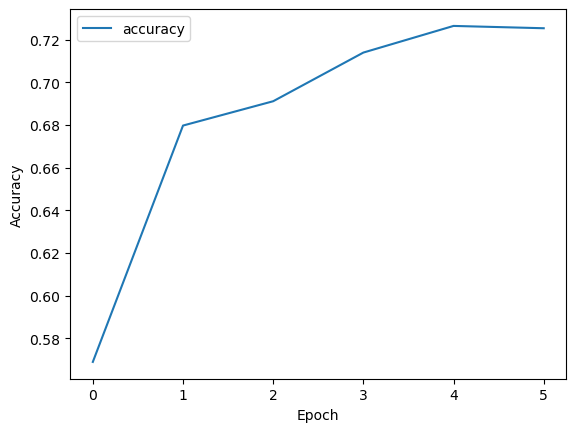

In [46]:
plt.plot(accuracy, label="accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()


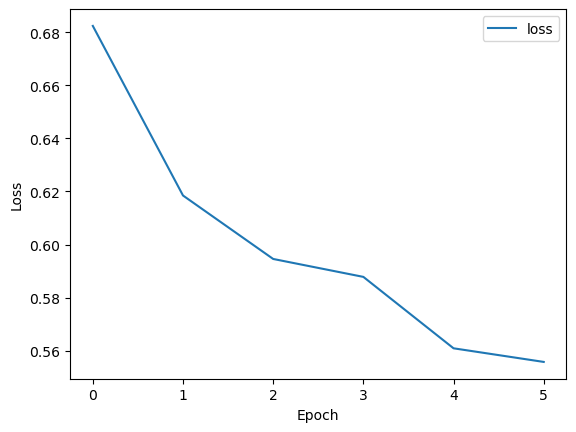

In [47]:
plt.plot(loss, label="loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [48]:
y_pred = model.predict(X_test_tensor)

 7/35 [=====>........................] - ETA: 0s

2023-05-05 17:08:30.296304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:08:30.297353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:08:30.298095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

35/35 [==============================] - 1s 8ms/step


In [49]:
final=[]
for row in y_pred:
    if row[0]>row[1]:
        final.append("YES")
    else:
        final.append("NO")

In [50]:
final

['NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'YES',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'YES',
 'NO',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'NO',
 'NO',
 'NO',
 'YES',
 'YES',
 'NO',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'NO',
 'YES',
 'YES',
 'NO',
 'YES',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'YES',
 'YES',
 'YES',
 'NO',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'NO',
 'YES',
 'YES',
 'NO',
 'YES',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'YES',
 'NO',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'NO',
 'NO',
 'YES',
 'YES',
 'NO',
 'YES',
 'NO',
 'YES',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'YES',
 'YES',
 'YES',
 'NO',
 'YE

In [51]:
print('Shape of y_pred:', len(final))

Shape of y_pred: 1098


In [52]:
result_dict = {}
val_id=validation['id_EXIST'].to_list() 
for i in range(1098):
    

    temp={"hard_label":final[i]}
    result_dict[val_id[i]]=temp
    

In [53]:
print(result_dict)
myKeys = list(result_dict.keys())
myKeys.sort()
result_dict = {i: result_dict[i] for i in myKeys}

{'500001': {'hard_label': 'NO'}, '500002': {'hard_label': 'NO'}, '500003': {'hard_label': 'NO'}, '500004': {'hard_label': 'NO'}, '500005': {'hard_label': 'YES'}, '500006': {'hard_label': 'NO'}, '500007': {'hard_label': 'YES'}, '500008': {'hard_label': 'NO'}, '500009': {'hard_label': 'YES'}, '500010': {'hard_label': 'NO'}, '500011': {'hard_label': 'NO'}, '500012': {'hard_label': 'NO'}, '500013': {'hard_label': 'NO'}, '500014': {'hard_label': 'YES'}, '500015': {'hard_label': 'NO'}, '500016': {'hard_label': 'NO'}, '500017': {'hard_label': 'NO'}, '500018': {'hard_label': 'NO'}, '500019': {'hard_label': 'NO'}, '500020': {'hard_label': 'YES'}, '500021': {'hard_label': 'NO'}, '500022': {'hard_label': 'YES'}, '500023': {'hard_label': 'NO'}, '500024': {'hard_label': 'YES'}, '500025': {'hard_label': 'YES'}, '500026': {'hard_label': 'YES'}, '500027': {'hard_label': 'YES'}, '500028': {'hard_label': 'YES'}, '500029': {'hard_label': 'YES'}, '500030': {'hard_label': 'YES'}, '500031': {'hard_label': '

In [54]:
import json

result_json = json.dumps(result_dict)

In [55]:
result_json

'{"500001": {"hard_label": "NO"}, "500002": {"hard_label": "NO"}, "500003": {"hard_label": "NO"}, "500004": {"hard_label": "NO"}, "500005": {"hard_label": "YES"}, "500006": {"hard_label": "NO"}, "500007": {"hard_label": "YES"}, "500008": {"hard_label": "NO"}, "500009": {"hard_label": "YES"}, "500010": {"hard_label": "NO"}, "500011": {"hard_label": "NO"}, "500012": {"hard_label": "NO"}, "500013": {"hard_label": "NO"}, "500014": {"hard_label": "YES"}, "500015": {"hard_label": "NO"}, "500016": {"hard_label": "NO"}, "500017": {"hard_label": "NO"}, "500018": {"hard_label": "NO"}, "500019": {"hard_label": "NO"}, "500020": {"hard_label": "YES"}, "500021": {"hard_label": "NO"}, "500022": {"hard_label": "YES"}, "500023": {"hard_label": "NO"}, "500024": {"hard_label": "YES"}, "500025": {"hard_label": "YES"}, "500026": {"hard_label": "YES"}, "500027": {"hard_label": "YES"}, "500028": {"hard_label": "YES"}, "500029": {"hard_label": "YES"}, "500030": {"hard_label": "YES"}, "500031": {"hard_label": 